In [1]:
import pandas as pd
#import clusterpy
import geopandas as gpd
import numpy as np
from numpy import median
from multiprocessing import Pool
import matplotlib.pyplot as plt
from cycler import cycler
import umap
import numpy as np
import pandas as pd
import requests
import os
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
X = pd.read_csv('X_DATA_TRXPSE_BC.csv', sep = ',', header = None)
y = pd.read_csv('Y_DATA_TRXPSE_BC.csv', sep = ',', header = None)
data = pd.merge(X, y, left_index=True, right_index=True)
data = data[0:500000]

In [3]:
len(y)

3324425

In [4]:
len(X)

3324425

In [5]:
len(data)

500000

In [6]:
data

,0_x,1,2,3,4,5,6,7,0_y
0,256974812,201636,20170505,195643,13224.93,cpv,NaN,NaN,Servicios bancarios
1,251620986,68793,20170406,162405,1854818.94,presentación y pago del impuesto predial unifi...,aaasauz null,NaN,Gobierno
2,251425682,206535,20170406,64334,25683.88,referencia de pago express no |,NaN,NaN,Valor agregado
3,320436535,19504,20180308,184518,626001.19,promotora ideales,juan rodriguez mesa b,NaN,Servicios bancarios
4,330741234,277770,20180418,164802,71622.27,recarga nequi pse,NaN,NaN,Servicios bancarios
5,244387233,121662,20170228,173507,15002.69,transaccion para generacion de certificados de...,idc,NaN,Administración central
6,299837089,122185,20171207,150107,16152.11,pago ordinario fic,alarcon conde,NaN,Educación
7,328241107,38437,20180409,153405,14085.63,transaccion para generacion de certificados de...,idc,NaN,Administración central
8,330413026,8769,20180417,150603,740054.55,NaN,pago de obligacion:,NaN,Servicios bancarios
9,225228925,72896,20161104,110327,180018.84,cpv,NaN,NaN,Servicios bancarios


In [7]:
col = ['0_y', 5]
df = data[col]
df = df[pd.notnull(df[5])]
df = df.dropna(subset=['0_y', 5])
for ref in df[5]: 
    #print(ref)
    ref = re.sub('[ñ!@#$]', '', str(ref))
    

In [8]:
df.columns = ['Product', 'Reference']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Reference,category_id
0,Servicios bancarios,cpv,0
1,Gobierno,presentación y pago del impuesto predial unifi...,1
2,Valor agregado,referencia de pago express no |,2
3,Servicios bancarios,promotora ideales,0
4,Servicios bancarios,recarga nequi pse,0


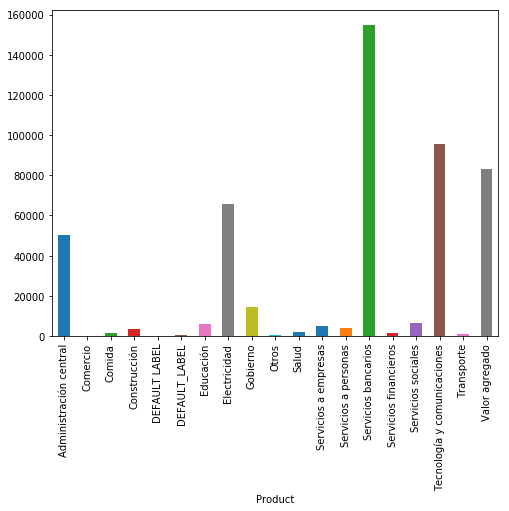

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Reference.count().plot.bar(ylim=0)
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

#stop_words = get_stop_words('en')
stop_words = get_stop_words('spanish')

#from stop_words import safe_get_stop_words
#stop_words = safe_get_stop_words('unsupported language')

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
features = tfidf.fit_transform(df.Reference).toarray()
labels = df.category_id
features.shape

(494499, 5017)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Reference'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#clf = MultinomialNB().fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


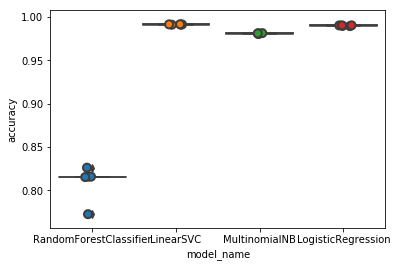

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  print(model)
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [13]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.991486
LogisticRegression        0.990198
MultinomialNB             0.981070
RandomForestClassifier    0.809012
Name: accuracy, dtype: float64

In [14]:
category_id_df.Product.values[3]='Administracion central'
category_id_df.Product.values[4]='Educacion'
category_id_df.Product.values[6]='Tecnologia y comunicaciones'
category_id_df.Product.values[7]='Construccion'
print(category_id_df.Product.values)

['Servicios bancarios' 'Gobierno' 'Valor agregado'
 'Administracion central' 'Educacion' 'Electricidad'
 'Tecnologia y comunicaciones' 'Construccion' 'Servicios sociales'
 'Servicios a empresas' 'Transporte' 'Salud' 'Servicios financieros'
 'Comida' 'Otros' 'Comercio' 'Servicios a personas' 'DEFAULT LABEL'
 'DEFAULT_LABEL']


In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
from sklearn.externals import joblib
joblib.dump(model, 'SVC.joblib') 
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Reference']])
      print('')

In [ ]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print((unigrams))
  print((bigrams))
  #print((trigrams))
  #print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  #print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))


In [ ]:
y_pred

In [ ]:
X

In [ ]:
#colmunic = gpd.read_file('Entradas/Municipios_RIMISP.shp')


''''
colmunic = gpd.read_file('Entradas/mpio.shp')
data['MPIO_CCNCT'] = np.where(data['Codigo_Mun']<10000, "0" + data['Codigo_Mun'].map(str), data['Codigo_Mun'].map(str))
join = colmunic.merge(data, on='MPIO_CCNCT')
join = join[(join.DPTO_CCDGO!=88)]
#real = join.dropna(subset=['IRCA_'+str(year), 'inv_'+str(year), 'pob_'+str(year), 'ing_'+str(year), 'trib_'+str(year), 'gasfun'+str(year), 'pergas'+str(year), 'cob_'+str(year), 'coburb'+str(year), 'cobrur'+str(year), 'meacap'+str(year), 'medcap'+str(year)])
#real = join.dropna(subset=['IRCA_'+str(year), 'inv_'+str(year), 'pob_'+str(year), 'ing_'+str(year), 'trib_'+str(year), 'gasfun'+str(year), 'pergas'+str(year), 'cob_'+str(year)])
real = join.dropna(subset=['inv_'+str(year), 'pob_'+str(year), 'ing_'+str(year), 'trib_'+str(year), 'gasfun'+str(year), 'pergas'+str(year), 'cob_'+str(year)])''''

In [ ]:
len(real)

In [ ]:
len(colmunic)

In [ ]:
real

In [ ]:
#from MulticoreTSNE import MulticoreTSNE as TSNE



In [ ]:
#tsne = TSNE(n_jobs=72)


In [ ]:
#print(real['IRCA_2016'])

In [ ]:
x=zip(real['IRCA_2016'], real['inv_2016'], real['pob_2016'], real['ing_2016'], real['trib_2016'], real['gasfun2016'], real['pergas2016'], real['cob_2016'])
#x=zip(real['IRCA_2016'], real['inv_2016'], real['pob_2016'], real['ing_2016'])

In [ ]:
type(x[0])

In [ ]:
print(x)

In [ ]:
X = np.array(x)
data = X

In [ ]:
print(X)

In [ ]:
sns.set(context="paper", style="white")

#print('Loading data')

#if not os.path.isfile('fashion-mnist.csv'):
#    csv_data = requests.get(
#        'https://www.openml.org/data/get_csv/18238735/phpnBqZGZ'
#    )
#    with open('fashion-mnist.csv', 'w') as f:
#        f.write(csv_data.text)
#source_df = pd.read_csv('fashion-mnist.csv')

#data = source_df.iloc[:, :784].values.astype(np.float32)
target = np.ones(len(data))



print('Sketch settings')

pal = [
 '#9e0142',
 '#d8434e',
 '#f67a49',
 '#fdbf6f',
 '#feeda1',
 '#f1f9a9',
 '#bfe5a0',
 '#74c7a5',
 '#378ebb',
 '#5e4fa2'
]
color_key = {str(d):c for d,c in enumerate(pal)}

print('Reducing')
reducer = umap.UMAP(random_state=42)
print('Embedding')
embedding = reducer.fit_transform(data)

df = pd.DataFrame(embedding, columns=('x', 'y'))
df['class'] = pd.Series([str(x) for x in target], dtype="category")
print('Plotting')
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')

utils.export_image(img, filename='fashion-mnist', background='black')

image = plt.imread('fashion-mnist.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Fashion MNIST data embedded\n"
          "into two dimensions by UMAP\n"
          "visualised with Datashader",
          fontsize=12)

plt.show()

In [ ]:
Y = tsne.fit_transform(X)

In [ ]:
classes = np.ones(len(Y))
classes = np.array(classes)

In [ ]:
def plot(Y, classes, name):
#def plot(Y, name):    
    digits = set(classes)
    fig = plt.figure()
    colormap = plt.cm.Spectral
    #colormap = plt.cm.viridis
    plt.gca().set_prop_cycle(
        cycler('color', [colormap(i) for i in np.linspace(0, 0.9, 10)]))
    ax = fig.add_subplot(111)
    labels = []
    
    
    for d in digits:
        idx = classes == d
        if Y.shape[1] == 1:
            ax.plot(Y[idx], np.random.randn(Y[idx].shape[0]), 'o')
        else:
            ax.plot(Y[idx, 0], Y[idx, 1], 'o')
        
        labels.append(d)
    ax.legend(labels, numpoints=1, fancybox=True)
    fig.savefig(name)
    if Y.shape[1] > 2:
        print('Warning! Plot shows only first two components!')

In [ ]:
filename = 'tsne.png'
plot(Y, classes, filename)
#plot(Y, filename)
print('Plot saved to %s' % filename)

In [ ]:
Y = tsne.fit_transform(X)
filename = 'tsne.png'
plot(Y, classes, filename)
#plot(Y, filename)
print('Plot saved to %s' % filename)

In [ ]:
Y = tsne.fit_transform(X)
filename = 'tsne.png'
plot(Y, classes, filename)
#plot(Y, filename)
print('Plot saved to %s' % filename)

In [ ]:
Y = tsne.fit_transform(X)
filename = 'tsne.png'
plot(Y, classes, filename)
#plot(Y, filename)
print('Plot saved to %s' % filename)

In [ ]:
Y = tsne.fit_transform(X)
filename = 'tsne.png'
plot(Y, classes, filename)
#plot(Y, filename)
print('Plot saved to %s' % filename)

In [ ]:
Y = tsne.fit_transform(X)
filename = 'tsne.png'
plot(Y, classes, filename)
#plot(Y, filename)
print('Plot saved to %s' % filename)